In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

In [67]:
df = pd.read_csv('bmi_and_life.csv')
df.shape

(163, 3)

In [ ]:
df.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [ ]:
df.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


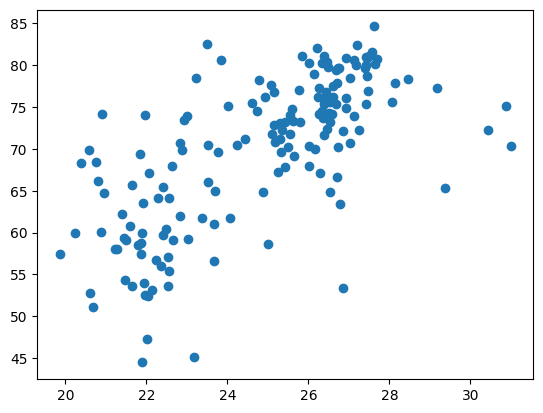

In [ ]:
plt.scatter(df['BMI'], df['Life expectancy'])

In [ ]:
df.isnull().sum()

Country            0
Life expectancy    0
BMI                0
dtype: int64

In [ ]:
df = df.drop('Country', axis=1)
df.shape

(163, 2)

## Modeling

In [ ]:
y = df[['Life expectancy']]
X = df[['BMI']]

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X.shape

(163, 1)

In [ ]:
  X_train.shape

(130, 1)

In [ ]:
X_train

,BMI
84,26.86102
2,24.59620
94,22.62295
45,20.88509
42,25.58841
...,...
71,26.71017
106,25.77291
14,27.02255
92,27.68361


In [ ]:
X_test.shape

(33, 1)

In [ ]:
X_test

,BMI
135,22.40484
115,24.77041
131,21.96917
55,27.16509
95,25.15669
29,27.01542
156,26.39123
51,30.86752
101,21.93536
145,21.87875


In [70]:
y_test

,Life expectancy
135,65.50
115,78.20
131,52.60
55,80.00
95,72.90
29,78.50
156,76.00
51,75.11
101,54.00
145,57.50


In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test)

In [ ]:
y_test.shape

(33, 1)

In [ ]:
y_pred.shape

(33, 1)

In [ ]:
y_test

,Life expectancy
135,65.50
115,78.20
131,52.60
55,80.00
95,72.90
29,78.50
156,76.00
51,75.11
101,54.00
145,57.50


In [ ]:
y_pred

array([[63.45609133],
       [69.51526299],
       [62.34016607],
       [75.64899701],
       [70.50468069],
       [75.26563223],
       [73.66683179],
       [85.13240224],
       [62.25356513],
       [62.10856426],
       [62.75170625],
       [76.33788561],
       [63.49069585],
       [75.52243822],
       [59.35815825],
       [64.78013036],
       [74.85570572],
       [72.70420633],
       [63.3369606 ],
       [64.52409279],
       [66.26133691],
       [74.23136441],
       [73.0859062 ],
       [75.85608622],
       [69.95070103],
       [76.23145943],
       [69.80582823],
       [64.57703693],
       [62.33386502],
       [74.14394382],
       [73.18200994],
       [61.37556834],
       [70.87039742]])

In [ ]:
lr.intercept_

array([6.06832791])

In [ ]:
lr.coef_

array([[2.56140028]])

## Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=False) #, random_state=42)

In [73]:
scores = []
indices = []
i = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    indices.append(train_index)

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

    print(f'fold {i} MSE score: ', score)
    i = i+1

fold 1 MSE score:  30.834193999689898
fold 2 MSE score:  25.971485950587912
fold 3 MSE score:  48.11508684758028
fold 4 MSE score:  34.09068173764475
fold 5 MSE score:  80.86691009651686


In [74]:
scores

[30.834193999689898,
 25.971485950587912,
 48.11508684758028,
 34.09068173764475,
 80.86691009651686]

In [ ]:
mean_score = np.mean(scores)
print("Mean MSE (KFold):", mean_score)

Mean MSE (KFold): 43.97567172640394


In [ ]:
indices

[array([ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  

In [ ]:
scores = []
indices = []
i = 1

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    indices.append(train_index)

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

    print(f'fold {i} MSE score: ', score)
    i = i+1

fold 1 MSE score:  42.499344082301846
fold 2 MSE score:  8.963831686250217
fold 3 MSE score:  40.53171425994649
fold 4 MSE score:  62.41750042026993
fold 5 MSE score:  44.24778107707156
fold 6 MSE score:  1.4956472535928529
fold 7 MSE score:  25.247746563006316
fold 8 MSE score:  43.2198678710672
fold 9 MSE score:  7.012293748432697
fold 10 MSE score:  13.631632426045808
fold 11 MSE score:  99.2884616617874
fold 12 MSE score:  2.6830916530907136
fold 13 MSE score:  9.909497979425115
fold 14 MSE score:  25.311334556979123
fold 15 MSE score:  21.494020313434593
fold 16 MSE score:  16.293976751534196
fold 17 MSE score:  36.696028760647884
fold 18 MSE score:  6.015492309368586
fold 19 MSE score:  10.777015955596895
fold 20 MSE score:  97.92200912502351
fold 21 MSE score:  1.076426654145494
fold 22 MSE score:  0.7810016319076879
fold 23 MSE score:  8.147684562137849
fold 24 MSE score:  5.396560208513381
fold 25 MSE score:  43.907524307195565
fold 26 MSE score:  107.05274974735421
fold 27 MS

In [ ]:
mean_score = np.mean(scores)
print("Mean MSE (Leave-One-Out):", mean_score)

Mean MSE (Leave-One-Out): 44.31927006986117


In [ ]:
indices

[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162]),
 array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14

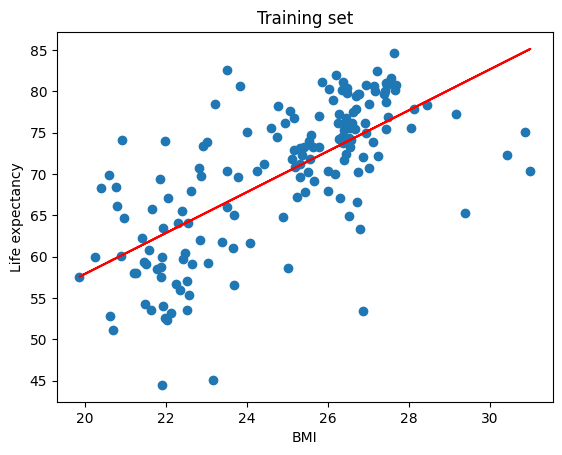

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title("Training set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.show()

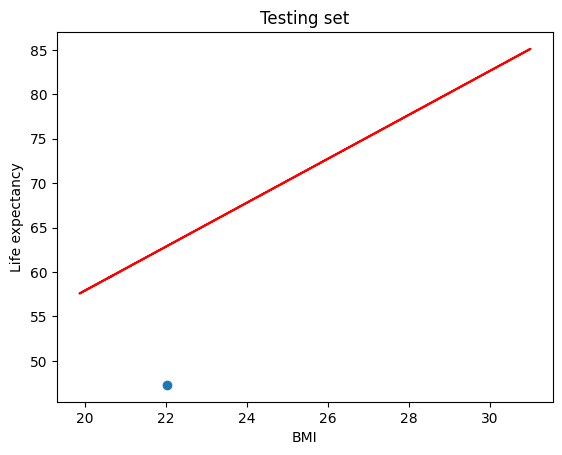

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title("Testing set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.show()

## Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
y = df[['Life expectancy']]
X = df[['BMI']]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
lr.intercept_

array([1560.95426712])

In [60]:
lr.coef_

array([[ 0.00000000e+00, -1.89399482e+02,  7.84223008e+00,
        -1.06044861e-01]])

In [61]:
y_pred = lr.predict(X_test)

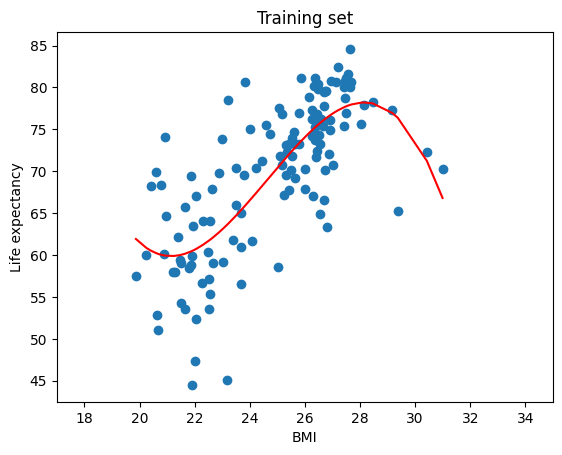

In [62]:
sort_idx = np.argsort(X_train[:, 1])
X_train_sorted = X_train[sort_idx, 1]
predictions_sorted = lr.predict(X_train[sort_idx])

plt.scatter(X_train[:, 1], y_train)
plt.plot(X_train_sorted, predictions_sorted, color='red')
plt.title("Training set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.xlim([17, 35])
plt.show()

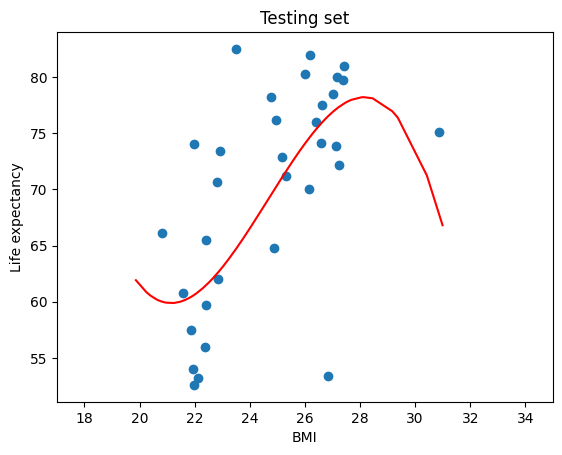

In [63]:
sort_idx = np.argsort(X_train[:, 1])
X_train_sorted = X_train[sort_idx, 1]
predictions_sorted = lr.predict(X_train[sort_idx])

plt.scatter(X_test[:,1], y_test)
plt.plot(X_train_sorted, predictions_sorted, color='red')
plt.title("Testing set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.xlim([17, 35])
plt.show()

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse_2 = mean_squared_error(y_test, y_pred, squared = False)

print("R-squared: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE 2: ", rmse_2)

R-squared:  0.22622685868749215
MAE:  6.911331480379525
MSE:  80.86691009651686
RMSE:  8.992603076780208
RMSE 2:  8.992603076780208
